In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

![](https://user-images.githubusercontent.com/36406676/52198187-54447c00-28a5-11e9-91da-a037f8cdd733.PNG)

## Activation_Functions

## Sigmoid

In [48]:
def Sigmoid(x):
    return 1 / ( 1+ np.exp(-x))

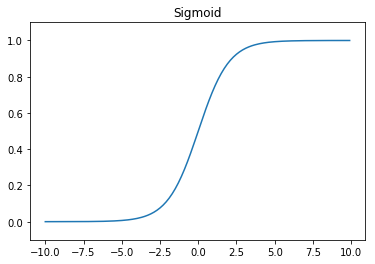

In [26]:
x = np.arange(-10,10,0.1)
y = Sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.title("Sigmoid")
plt.show()


## ReLU

In [27]:
def ReLU(x):
    return x * (x > 0)

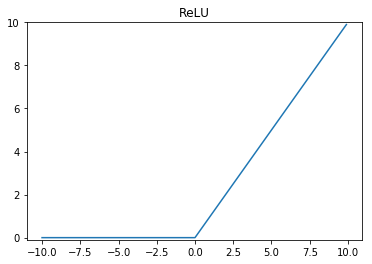

In [28]:
x = np.arange(-10,10,0.1)
y = ReLU(x)
plt.plot(x,y)
plt.ylim(-0.1,10)
plt.title("ReLU")
plt.show()

## Leaky ReLU

In [29]:
def Leaky_ReLU(x):
    return np.where(x > 0, x, x * 0.01)

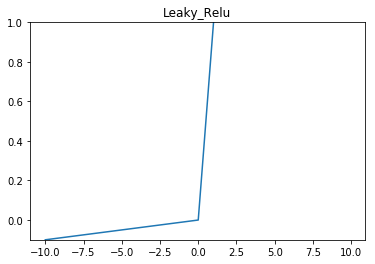

In [30]:
x = np.arange(-10,10,0.1)
y = Leaky_ReLU(x)
plt.plot(x,y)
plt.ylim(-0.1,1)
plt.title("Leaky_Relu")
plt.show()

## Tanh(x)

In [31]:
def Tanh(x):
    return (np.exp(2*x) -1) / (np.exp(2*x) +1)

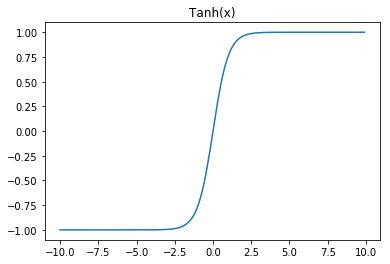

In [32]:
x = np.arange(-10,10,0.1)
y = Tanh(x)
plt.plot(x,y)
plt.title("Tanh(x)")
plt.ylim(-1.1,1.1)
plt.show()

## ELU

In [33]:
def ELU(x,a):
    return np.where(x>=0, x, a*(np.exp(x)-1))

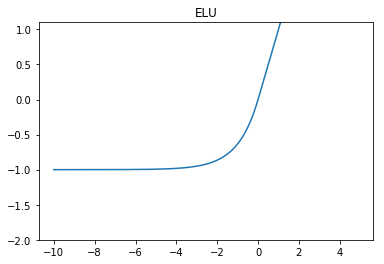

In [34]:
x = np.arange(-10,5,0.1)
y = ELU(x,1)
plt.plot(x,y)
plt.title("ELU")
plt.ylim(-2,1.1)
plt.show()

![](https://user-images.githubusercontent.com/36406676/52198102-1fd0c000-28a5-11e9-9dc6-ea97aa4943c8.PNG)

In [35]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self,x):
        self.x = x
        out = 1 / ( 1+ np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = (1-self.out)*(self.out)
        return dx
        

In [36]:
sigmoid_layer1 = Sigmoid()
sigmoid_layer2 = Sigmoid()
sigmoid_layer3 = Sigmoid()


In [37]:
x1 = 10
x2 = 0
x3 = -10

In [38]:
print(sigmoid_layer1.forward(x1)) # 1에 가까운 수
print(sigmoid_layer2.forward(x2)) # 0.5
print(sigmoid_layer3.forward(x3)) # 0에 가까운 수

0.9999546021312976
0.5
4.5397868702434395e-05


In [39]:
print(sigmoid_layer1.backward(1)) # 0에 가까움
print(sigmoid_layer2.backward(1)) # 0.25 정상
print(sigmoid_layer3.backward(1)) # 0에 가까움 gradient가 죽는다.

4.5395807735907655e-05
0.25
4.5395807735951673e-05


![](https://user-images.githubusercontent.com/36406676/52200301-c91ab480-28ab-11e9-89f2-216bf4e52be2.PNG)

In [40]:
class Relu:
    def __init__(self):
        pass
    
    def forward(self,x):
        self.x = x
        out= self.x * (self.x > 0)
        self.out = out
        return out
    
    def backward(self, dout):
        dx = np.where(self.x >=0, dout*self.x,0)
        return dx
        

In [41]:
relu_layer1 = Relu()
relu_layer2 = Relu()
relu_layer3 = Relu()


In [42]:
x1 = 10
x2 = 0
x3 = -10

In [43]:
print(relu_layer1.forward(x1)) # 10
print(relu_layer2.forward(x2)) # 0
print(relu_layer3.forward(x3)) # 0

10
0
0


In [44]:
print(relu_layer1.backward(1)) # 10
print(relu_layer2.backward(1)) #  0
print(relu_layer3.backward(1)) #  0 0보다 작은 구간에서 graident가 죽는다 

10
0
0


## Weight Initialization

In [72]:
input_data = np.random.randn(1000,100) # 1000개의 데이터
node_num = 100 # 각 은닉층의 노드 수
hidden_layer_size = 5 # 은닉충이 5개
activations = {} # 이곳에 활성화 결과(활성화값)를 저장

In [73]:
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) *1 # 가중치의 표준편차 1
    a = np.dot(x,w)
        
    #variation of activation functions
    z = Sigmoid(a)
        
    activations[i] = z

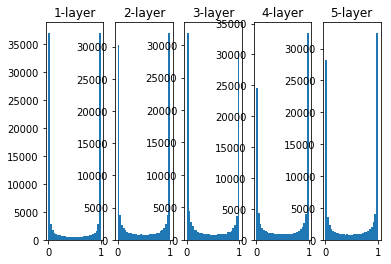

In [74]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
plt.show()

In [96]:
#### 각층의 활성화 값이 0과 1에 치우쳐 분포되어있다.  가중치의 표준편차를 0.01로 바꿔본다

activations = {} # 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) *0.01 # 가중치의 표준편차 0.01
    a = np.dot(x,w)
        
    #variation of activation functions
    z = Sigmoid(a)
        
    activations[i] = z

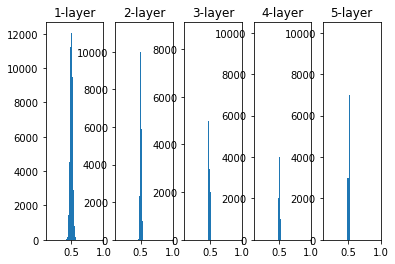

In [98]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.xlim(0.1,1)
plt.show()

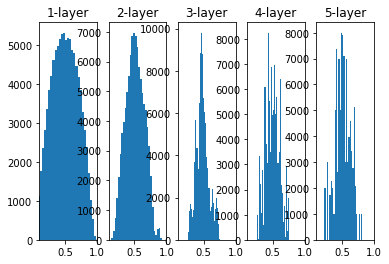

In [99]:
## 활성화값들이 중앙에 몰려있다. 활성화값들이 치우치면 표현력을 제한한다는 관점에서 문제가 된다
#### 각층의 활성화 값이 0과 1에 치우쳐 분포되어있다.  가중치의 표준편차를 0.01로 바꿔본다
activations = {} 
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) * np.sqrt(1/node_num) # 1/sqrt(n)
    a = np.dot(x,w)
        
    #variation of activation functions
    z = Sigmoid(a)
        
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.xlim(0.1,1)
plt.show()

## 앞층의 노드가 많을수록 대상노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다. 
# sigmoid와 tanh함수는 좌우대칭이라 중앙부근이 선형인 함수로 볼 수 있다. 그래서 Xavier초깃값이 적당하다.
# 반면 ReLU를 이용할 때는 ReLU에 측화된초깃값을 이용하라고 권장된다 - He초깃값
# ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다.(직감적으로)

## ReLU에서의 weight_Initilization

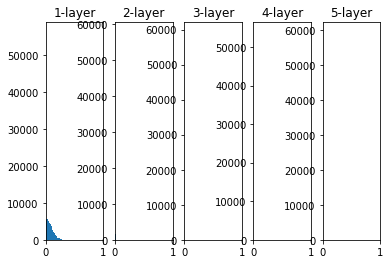

In [102]:
activations = {} 
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) *0.01 # 가중치의 표준편차 1
    a = np.dot(x,w)
        
    #variation of activation functions
    z = ReLU(a)
        
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.xlim(0,1)
plt.show()

## 결과를 보면 std = 0.01일 때의 각층의 활성화 값들이 아주 작은 값들입니다. 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻
## 이는 중대한 문제이며 실제로도 학습이 이뤄지지 않을 것이다.

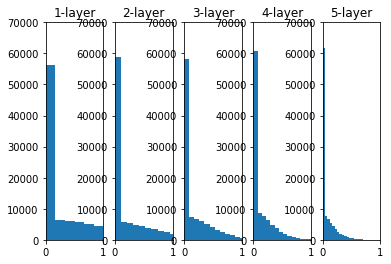

In [107]:
activations = {} 
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) * np.sqrt(1/node_num) # 가중치의 표준편차 1
    a = np.dot(x,w)
        
    #variation of activation functions
    z = ReLU(a)
        
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.ylim(0,70000)
    plt.xlim(0,1)
plt.show()
## Xavier초깃값 결과를 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 커진다. 실제로 층이 깊어지면 활성화값들의 치우침도 커지고 학습할 때 '기울기 소실' 문제를 일으킵니다. 

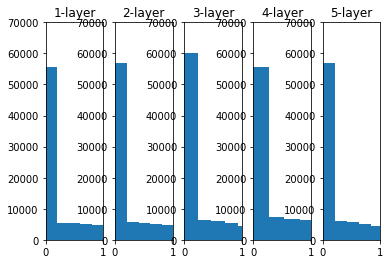

In [106]:
activations = {} 
x = input_data
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    #variation  of initializers
    w = np.random.randn(node_num, node_num) * np.sqrt(2/node_num) # He
    a = np.dot(x,w)
        
    #variation of activation functions
    z = ReLU(a)
        
    activations[i] = z
    
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + '-layer')
    plt.hist(a.flatten(), 30)
    plt.ylim(0,70000)
    plt.xlim(0,1)
plt.show()
## 모든 층에서 균일하게 분포. 층이 깊어져도 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것으로 기대할 수 있습니다.
## Relu 함수를 사용할 때는 He초깃값을, sigmoid나 tanh등의 S자 모양 곡선일 때는 Xavier초깃값을 쓰는것이 좋다.

## Batch Normalization